In [ ]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU

## Loading the data

In [ ]:
apple_data_path="/content/drive/MyDrive/AAPL.csv"
samsung_data_path="/content/drive/MyDrive/005930.KS.csv"

In [ ]:
apple_data = pd.read_csv(apple_data_path)
samsung_data=pd.read_csv(samsung_data_path)

In [ ]:
apple_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-20,44.592499,45.367500,43.877499,44.244999,42.466835,271300800
1,2018-11-21,44.932499,45.067501,44.137501,44.195000,42.418846,124496800
2,2018-11-23,43.735001,44.150002,43.025002,43.072498,41.341454,94496000
3,2018-11-26,43.560001,43.737499,42.564999,43.654999,41.900539,179994000
4,2018-11-27,42.877499,43.692501,42.720001,43.560001,41.809364,165549600


In [ ]:
samsung_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-20,42450.0,43000.0,42100.0,42800.0,37331.148438,9420664
1,2018-11-21,41800.0,42300.0,41800.0,42100.0,36720.593750,10769589
2,2018-11-22,42000.0,42650.0,42000.0,42450.0,37025.871094,5970796
3,2018-11-23,42450.0,42600.0,41900.0,42400.0,36982.253906,5192638
4,2018-11-26,42150.0,42800.0,42100.0,42600.0,37156.710938,6613009


In [ ]:
apple_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1257 non-null   object 
 1   Open       1257 non-null   float64
 2   High       1257 non-null   float64
 3   Low        1257 non-null   float64
 4   Close      1257 non-null   float64
 5   Adj Close  1257 non-null   float64
 6   Volume     1257 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [ ]:
samsung_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1232 non-null   object 
 1   Open       1232 non-null   float64
 2   High       1232 non-null   float64
 3   Low        1232 non-null   float64
 4   Close      1232 non-null   float64
 5   Adj Close  1232 non-null   float64
 6   Volume     1232 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.5+ KB


In [ ]:
apple_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,119.607427,121.010338,118.312086,119.727776,118.228031,1.045027e+08
std,46.735861,47.203055,46.296896,46.765948,47.012127,5.388640e+07
min,35.994999,36.430000,35.500000,35.547501,34.118877,3.145820e+07
25%,71.205002,72.495003,70.730003,72.019997,70.330711,6.958930e+07
50%,132.429993,134.070007,130.929993,132.300003,130.748138,9.010520e+07
75%,155.910004,157.820007,153.949997,156.570007,154.998505,1.228489e+08
max,196.240005,198.229996,195.279999,196.449997,195.926956,4.265100e+08


In [ ]:
samsung_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1.232000e+03
mean,62157.954545,62702.069805,61589.123377,62123.823052,58934.115735,1.551346e+07
std,12507.141000,12568.274865,12432.491277,12476.265633,13250.832604,8.254281e+06
min,37450.000000,37600.000000,36850.000000,37450.000000,32969.085938,0.000000e+00
25%,51975.000000,52575.000000,51600.000000,52075.000000,47083.176758,1.063573e+07
50%,61100.000000,61600.000000,60500.000000,61000.000000,59754.046875,1.390690e+07
75%,71525.000000,72100.000000,70800.000000,71400.000000,70225.000000,1.848577e+07
max,90300.000000,96800.000000,89500.000000,91000.000000,86286.703125,9.030618e+07


# Data Visualization and Pre-processing

In [ ]:
# Checking the time period covered by each dataset
apple_start_date, apple_end_date = apple_data['Date'].min(), apple_data['Date'].max()
samsung_start_date, samsung_end_date = samsung_data['Date'].min(), samsung_data['Date'].max()

print(f"Apple data period: {apple_start_date} to {apple_end_date}")
print(f"Samsung data period: {samsung_start_date} to {samsung_end_date}")

# Checking if the periods match
if apple_start_date == samsung_start_date and apple_end_date == samsung_end_date:
    print("Time periods match.")
else:
    print("Time periods do not match.")

# Checking for matching data points
apple_dates = set(apple_data['Date'])
samsung_dates = set(samsung_data['Date'])

# Dates present in one dataset but not the other
unmatched_dates = apple_dates.symmetric_difference(samsung_dates)
if len(unmatched_dates) == 0:
    print("All dates match in both datasets.")
else:
    print(f"Number of unmatched dates: {len(unmatched_dates)}")

print("Some unmatched dates:", list(unmatched_dates)[:10])  # Print first 10 unmatched dates


Apple data period: 2018-11-20 to 2023-11-17
Samsung data period: 2018-11-20 to 2023-11-20
Time periods do not match.
Number of unmatched dates: 107
Some unmatched dates: ['2021-05-05', '2020-02-17', '2023-05-01', '2023-09-28', '2019-02-04', '2023-03-01', '2022-06-20', '2019-10-03', '2023-09-04', '2023-01-02']


In [ ]:
samsung_data = samsung_data[samsung_data['Date'] <= '2023-11-17']
apple_data = apple_data[~apple_data['Date'].isin(unmatched_dates)]
samsung_data = samsung_data[~samsung_data['Date'].isin(unmatched_dates)]

# Verify synchronization
print(f"Apple data period: {apple_data['Date'].min()} to {apple_data['Date'].max()}")
print(f"Samsung data period: {samsung_data['Date'].min()} to {samsung_data['Date'].max()}")
print(f"Number of unmatched dates: {len(set(apple_data['Date']).symmetric_difference(set(samsung_data['Date'])))}")


Apple data period: 2018-11-20 to 2023-11-17
Samsung data period: 2018-11-20 to 2023-11-17
Number of unmatched dates: 0


### Time Series Plots

In [ ]:
def plot_time_series(df, column, title):
    plt.figure(figsize=(10, 6))
    plt.plot(df['Date'], df[column], label=column)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

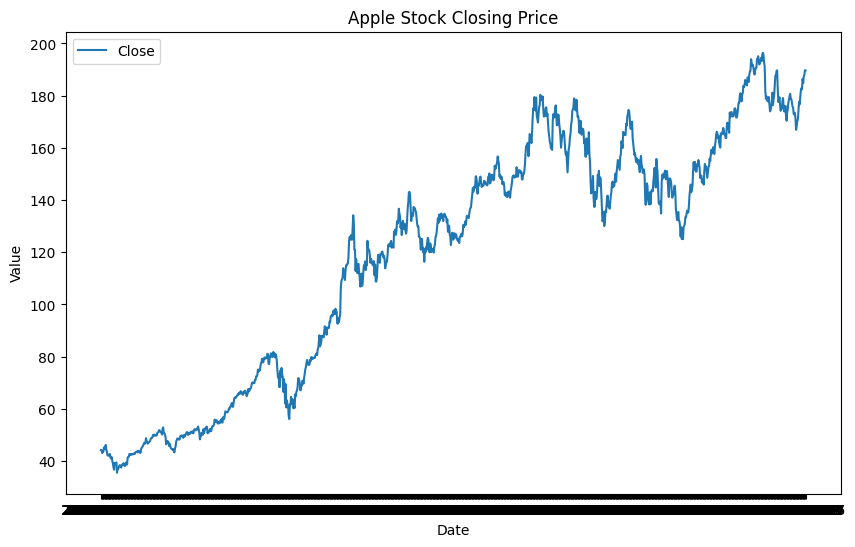

In [ ]:

plot_time_series(apple_data, 'Close', 'Apple Stock Closing Price')

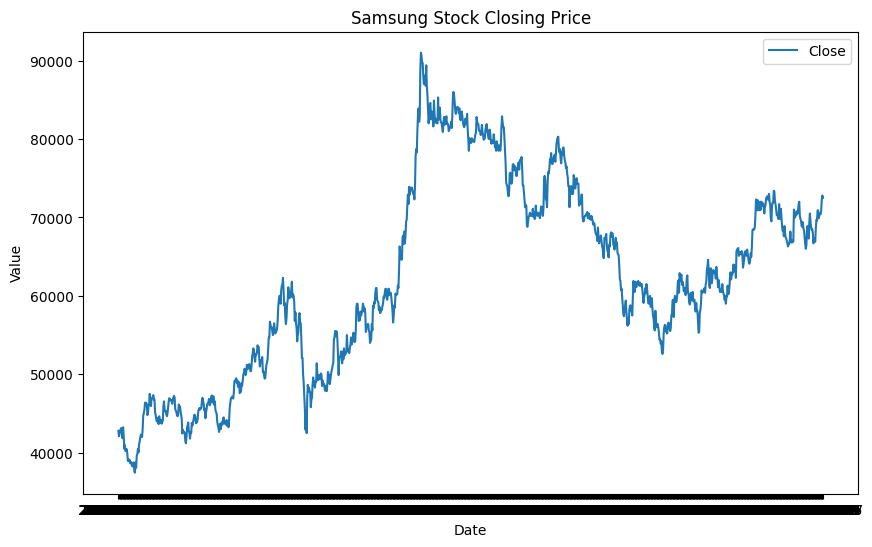

In [ ]:
plot_time_series(samsung_data, 'Close', 'Samsung Stock Closing Price')

In [ ]:
def check_stationarity(df, column):
    result = adfuller(df[column].dropna())
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] > 0.05:
        print("Series is not stationary")
    else:
        print("Series is stationary")



In [ ]:
check_stationarity(apple_data, 'Close')

ADF Statistic: -0.9826788406856433
p-value: 0.759529257707552
Series is not stationary


In [ ]:
check_stationarity(samsung_data, 'Close')


ADF Statistic: -1.6700749898874803
p-value: 0.44659292596246675
Series is not stationary


In [ ]:

# Apply log transformation
apple_data['Log_Close'] = np.log(apple_data['Close'])
samsung_data['Log_Close'] = np.log(samsung_data['Close'])




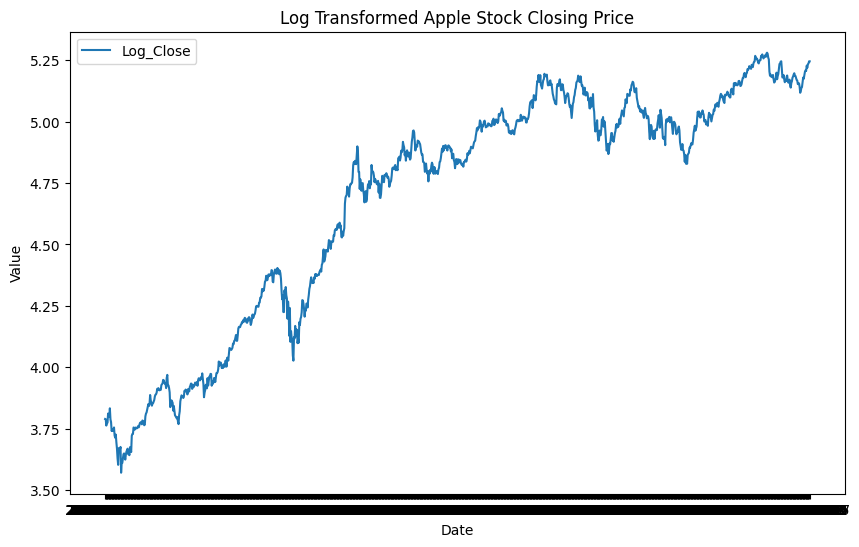

In [ ]:
# Visualize the log-transformed data
plot_time_series(apple_data, 'Log_Close', 'Log Transformed Apple Stock Closing Price')


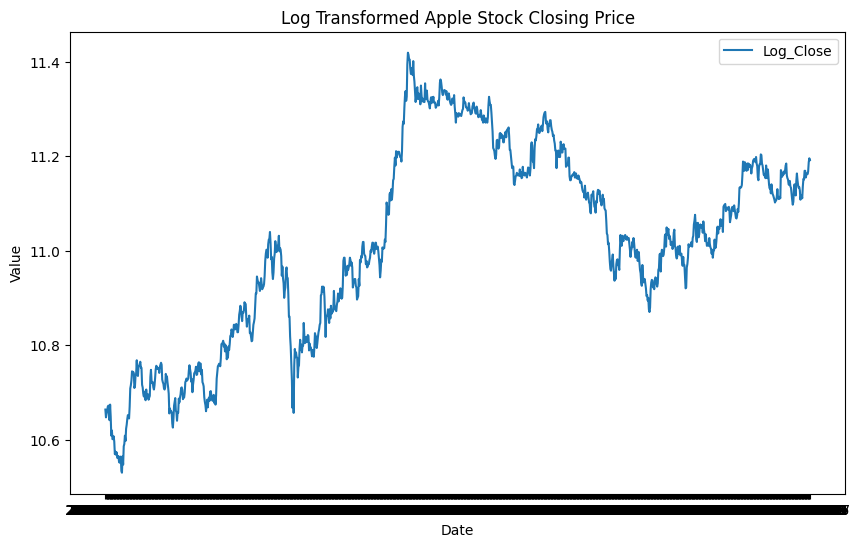

In [ ]:
# Visualize the log-transformed data
plot_time_series(samsung_data, 'Log_Close', 'Log Transformed Apple Stock Closing Price')


In [ ]:
# Check stationarity again

check_stationarity(apple_data, 'Log_Close')
check_stationarity(samsung_data, 'Log_Close')


ADF Statistic: -1.4707986733565326
p-value: 0.5479042078165658
Series is not stationary
ADF Statistic: -1.7567129901225105
p-value: 0.402154219959693
Series is not stationary


<ipython-input-16-e452594916f7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_apple = apple_data.corr()


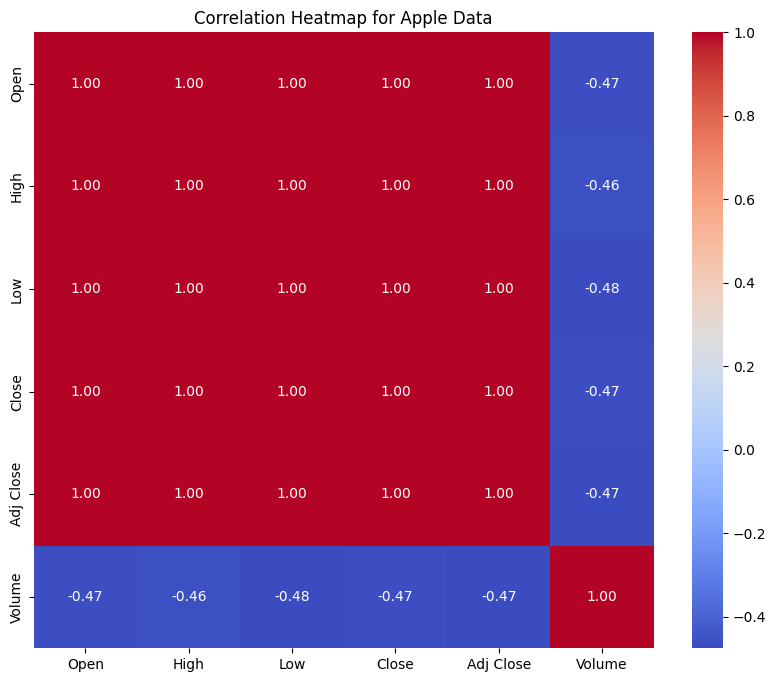

In [ ]:
corr_matrix_apple = apple_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_apple, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap for Apple Data')
plt.show()

<ipython-input-17-b91d0dcc89f0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_samsung = samsung_data.corr()


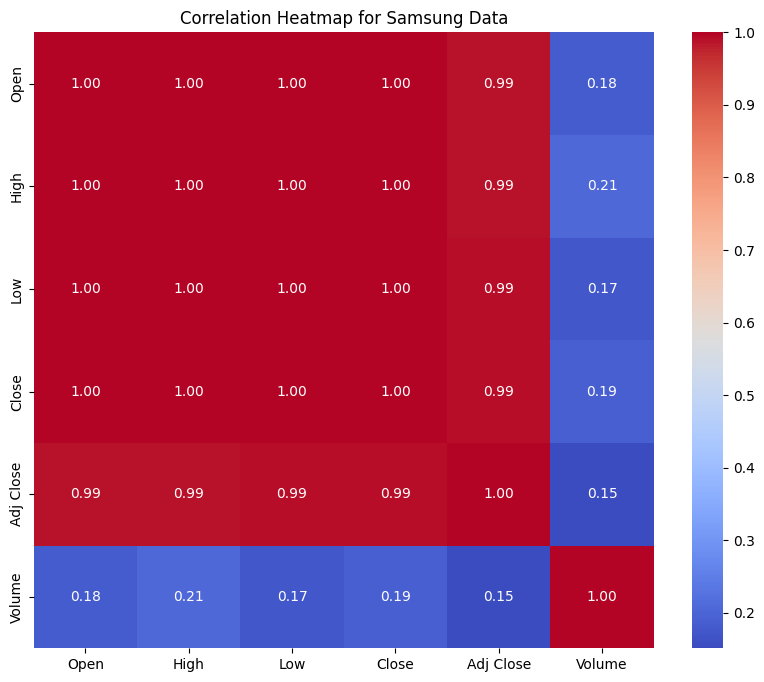

In [ ]:
corr_matrix_samsung = samsung_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_samsung, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap for Samsung Data')
plt.show()

In [ ]:
# Normalization using Min-Max Scaler
scaler = MinMaxScaler()


features_to_scale = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


apple_data[features_to_scale] = scaler.fit_transform(apple_data[features_to_scale])
samsung_data[features_to_scale] = scaler.fit_transform(samsung_data[features_to_scale])


## Splitting the datasets into train, validation and test sets

In [ ]:
# Function to split data into train, validation, and test sets
def split_data(df, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    total_rows = len(df)
    train_end = int(total_rows * train_ratio)
    val_end = int(total_rows * (train_ratio + val_ratio))

    train_data = df[:train_end]
    val_data = df[train_end:val_end]
    test_data = df[val_end:]

    return train_data, val_data, test_data

# Splitting the Apple data
apple_train, apple_val, apple_test = split_data(apple_data)

# Splitting the Samsung data
samsung_train, samsung_val, samsung_test = split_data(samsung_data)

# Print shapes as a sanity check
print("Apple - Train:", apple_train.shape, "Validation:", apple_val.shape, "Test:", apple_test.shape)
print("Samsung - Train:", samsung_train.shape, "Validation:", samsung_val.shape, "Test:", samsung_test.shape)

Apple - Train: (833, 8) Validation: (179, 8) Test: (179, 8)
Samsung - Train: (833, 8) Validation: (179, 8) Test: (179, 8)


In [ ]:
def create_sequences(data, sequence_length, feature_index):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data.iloc[i:(i + sequence_length), feature_index].values)
        y.append(data.iloc[i + sequence_length, feature_index])
    return np.array(X), np.array(y)

sequence_length = 30  # Number of time steps in each sequence
close_price_index = 3  # Index of 'Close' column

# Prepare sequences for each dataset
X_apple_train, y_apple_train = create_sequences(apple_train, sequence_length, close_price_index)
X_apple_val, y_apple_val = create_sequences(apple_val, sequence_length, close_price_index)
X_apple_test, y_apple_test = create_sequences(apple_test, sequence_length, close_price_index)

X_samsung_train, y_samsung_train = create_sequences(samsung_train, sequence_length, close_price_index)
X_samsung_val, y_samsung_val = create_sequences(samsung_val, sequence_length, close_price_index)
X_samsung_test, y_samsung_test = create_sequences(samsung_test, sequence_length, close_price_index)

# Reshape the data for RNN input
X_apple_train = X_apple_train.reshape((X_apple_train.shape[0], sequence_length, 1))
X_apple_val = X_apple_val.reshape((X_apple_val.shape[0], sequence_length, 1))
X_apple_test = X_apple_test.reshape((X_apple_test.shape[0], sequence_length, 1))

X_samsung_train = X_samsung_train.reshape((X_samsung_train.shape[0], sequence_length, 1))
X_samsung_val = X_samsung_val.reshape((X_samsung_val.shape[0], sequence_length, 1))
X_samsung_test = X_samsung_test.reshape((X_samsung_test.shape[0], sequence_length, 1))


# Building the baseline RNN model

In [ ]:
def build_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(units=50, activation='relu', input_shape=input_shape))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
    model.summary()
    return model

apple_rnn_model = build_rnn_model((sequence_length, 1))
samsung_rnn_model = build_rnn_model((sequence_length, 1))


Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_29 (SimpleRNN)   (None, 50)                2600      
                                                                 
 dense_36 (Dense)            (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_30 (SimpleRNN)   (None, 50)                2600      
                                                                 
 dense_37 (Dense)            (None, 1)                 51        
                                                              

## **Baseline model history of Apple Data**

In [ ]:
# Train the Apple RNN model
apple_history = apple_rnn_model.fit(X_apple_train, y_apple_train, epochs=20, batch_size=32,
                                    validation_data=(X_apple_val, y_apple_val))

Epoch 1/20
26/26 [==============================] - 2s 18ms/step - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 2/20
26/26 [==============================] - 0s 8ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 9.7125e-04 - val_mse: 9.7125e-04
Epoch 3/20
26/26 [==============================] - 0s 9ms/step - loss: 4.0678e-04 - mse: 4.0678e-04 - val_loss: 5.3895e-04 - val_mse: 5.3895e-04
Epoch 4/20
26/26 [==============================] - 0s 8ms/step - loss: 3.2542e-04 - mse: 3.2542e-04 - val_loss: 5.2647e-04 - val_mse: 5.2647e-04
Epoch 5/20
26/26 [==============================] - 0s 9ms/step - loss: 3.0459e-04 - mse: 3.0459e-04 - val_loss: 5.4197e-04 - val_mse: 5.4197e-04
Epoch 6/20
26/26 [==============================] - 0s 13ms/step - loss: 3.0857e-04 - mse: 3.0857e-04 - val_loss: 5.2229e-04 - val_mse: 5.2229e-04
Epoch 7/20
26/26 [==============================] - 0s 15ms/step - loss: 3.0376e-04 - mse: 3.0376e-04 - val_loss: 5.1491e-04 - val_mse: 5.1491e-04

# **Baseline model history of Samsung Data**

In [ ]:
samsung_history = samsung_rnn_model.fit(X_samsung_train, y_samsung_train, epochs=20, batch_size=32,
                                        validation_data=(X_samsung_val, y_samsung_val))

Epoch 1/20
26/26 [==============================] - 2s 27ms/step - loss: 0.2262 - mse: 0.2262 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 2/20
26/26 [==============================] - 0s 14ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 3/20
26/26 [==============================] - 0s 12ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 6.1762e-04 - val_mse: 6.1762e-04
Epoch 4/20
26/26 [==============================] - 0s 9ms/step - loss: 8.8597e-04 - mse: 8.8597e-04 - val_loss: 6.1212e-04 - val_mse: 6.1212e-04
Epoch 5/20
26/26 [==============================] - 0s 9ms/step - loss: 8.2203e-04 - mse: 8.2203e-04 - val_loss: 5.6603e-04 - val_mse: 5.6603e-04
Epoch 6/20
26/26 [==============================] - 0s 8ms/step - loss: 8.2268e-04 - mse: 8.2268e-04 - val_loss: 5.4831e-04 - val_mse: 5.4831e-04
Epoch 7/20
26/26 [==============================] - 0s 8ms/step - loss: 7.8131e-04 - mse: 7.8131e-04 - val_loss: 6.0324e-04 - val_mse: 6.0324e-04
Epoch 8/20
26/2

### Improving the Baseline model by adding batch normalization and dropout layers

In [ ]:
def build_rnn_model_2(input_shape):
    model = Sequential()

    # First RNN layer with Batch Normalization
    model.add(SimpleRNN(units=50, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(BatchNormalization())

    # Second RNN layer
    model.add(SimpleRNN(units=50, activation='relu'))
    model.add(BatchNormalization())

    # Dropout layer for regularization
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(units=1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
    model.summary()

    return model


In [ ]:
apple_rnn_model_2 = build_rnn_model_2((sequence_length, 1))


Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_31 (SimpleRNN)   (None, 30, 50)            2600      
                                                                 
 batch_normalization_26 (Ba  (None, 30, 50)            200       
 tchNormalization)                                               
                                                                 
 simple_rnn_32 (SimpleRNN)   (None, 50)                5050      
                                                                 
 batch_normalization_27 (Ba  (None, 50)                200       
 tchNormalization)                                               
                                                                 
 dropout_13 (Dropout)        (None, 50)                0         
                                                                 
 dense_38 (Dense)            (None, 1)               

In [ ]:
samsung_rnn_model_2 = build_rnn_model_2((sequence_length, 1))

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_33 (SimpleRNN)   (None, 30, 50)            2600      
                                                                 
 batch_normalization_28 (Ba  (None, 30, 50)            200       
 tchNormalization)                                               
                                                                 
 simple_rnn_34 (SimpleRNN)   (None, 50)                5050      
                                                                 
 batch_normalization_29 (Ba  (None, 50)                200       
 tchNormalization)                                               
                                                                 
 dropout_14 (Dropout)        (None, 50)                0         
                                                                 
 dense_39 (Dense)            (None, 1)               

In [ ]:
# Train the Apple RNN model
apple_history_2 = apple_rnn_model_2.fit(X_apple_train, y_apple_train, epochs=20, batch_size=32,
                                    validation_data=(X_apple_val, y_apple_val))

Epoch 1/20
26/26 [==============================] - 3s 31ms/step - loss: 1.9683 - mse: 1.9683 - val_loss: 0.2704 - val_mse: 0.2704
Epoch 2/20
26/26 [==============================] - 0s 18ms/step - loss: 1.4286 - mse: 1.4286 - val_loss: 0.0775 - val_mse: 0.0775
Epoch 3/20
26/26 [==============================] - 0s 18ms/step - loss: 1.1359 - mse: 1.1359 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 4/20
26/26 [==============================] - 0s 16ms/step - loss: 0.9558 - mse: 0.9558 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 5/20
26/26 [==============================] - 0s 17ms/step - loss: 0.8572 - mse: 0.8572 - val_loss: 0.0247 - val_mse: 0.0247
Epoch 6/20
26/26 [==============================] - 1s 19ms/step - loss: 0.6960 - mse: 0.6960 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 7/20
26/26 [==============================] - 1s 28ms/step - loss: 0.6901 - mse: 0.6901 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 8/20
26/26 [==============================] - 1s 27ms/step - loss: 0.5881 - m

In [ ]:
samsung_history_2 = samsung_rnn_model_2.fit(X_samsung_train, y_samsung_train, epochs=20, batch_size=32,
                                        validation_data=(X_samsung_val, y_samsung_val))

Epoch 1/20
26/26 [==============================] - 3s 30ms/step - loss: 1.6497 - mse: 1.6497 - val_loss: 0.0228 - val_mse: 0.0228
Epoch 2/20
26/26 [==============================] - 0s 16ms/step - loss: 1.2622 - mse: 1.2622 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 3/20
26/26 [==============================] - 0s 18ms/step - loss: 1.0731 - mse: 1.0731 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 4/20
26/26 [==============================] - 0s 16ms/step - loss: 0.9218 - mse: 0.9218 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 5/20
26/26 [==============================] - 0s 17ms/step - loss: 0.7968 - mse: 0.7968 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 6/20
26/26 [==============================] - 0s 16ms/step - loss: 0.7366 - mse: 0.7366 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 7/20
26/26 [==============================] - 0s 17ms/step - loss: 0.5792 - mse: 0.5792 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 8/20
26/26 [==============================] - 0s 17ms/step - loss: 0.5114 - m

# Building the LSTM Model

In [ ]:
def build_lstm_model(input_shape):
    model = Sequential()

    # First LSTM layer with Batch Normalization
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(BatchNormalization())

    # Second LSTM layer
    model.add(LSTM(units=50, return_sequences=False))
    model.add(BatchNormalization())

    # Dropout layer for regularization
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(units=1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
    model.summary()

    return model


In [ ]:
 # Building the Model

apple_lstm_model = build_lstm_model((sequence_length, number_of_features))


Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 30, 50)            10400     
                                                                 
 batch_normalization_30 (Ba  (None, 30, 50)            200       
 tchNormalization)                                               
                                                                 
 lstm_17 (LSTM)              (None, 50)                20200     
                                                                 
 batch_normalization_31 (Ba  (None, 50)                200       
 tchNormalization)                                               
                                                                 
 dropout_15 (Dropout)        (None, 50)                0         
                                                                 
 dense_40 (Dense)            (None, 1)               

In [ ]:
samsung_lstm_model = build_lstm_model((sequence_length, number_of_features))

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 30, 50)            10400     
                                                                 
 batch_normalization_32 (Ba  (None, 30, 50)            200       
 tchNormalization)                                               
                                                                 
 lstm_19 (LSTM)              (None, 50)                20200     
                                                                 
 batch_normalization_33 (Ba  (None, 50)                200       
 tchNormalization)                                               
                                                                 
 dropout_16 (Dropout)        (None, 50)                0         
                                                                 
 dense_41 (Dense)            (None, 1)               

In [ ]:
# Train the Apple LSTM model
apple_lstm_history = apple_lstm_model.fit(
    X_apple_train, y_apple_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_apple_val, y_apple_val)
)




Epoch 1/20
26/26 [==============================] - 8s 71ms/step - loss: 2.4136 - mse: 2.4136 - val_loss: 0.2560 - val_mse: 0.2560
Epoch 2/20
26/26 [==============================] - 1s 35ms/step - loss: 1.9641 - mse: 1.9641 - val_loss: 0.1986 - val_mse: 0.1986
Epoch 3/20
26/26 [==============================] - 1s 44ms/step - loss: 1.5748 - mse: 1.5748 - val_loss: 0.1753 - val_mse: 0.1753
Epoch 4/20
26/26 [==============================] - 1s 32ms/step - loss: 1.4669 - mse: 1.4669 - val_loss: 0.1703 - val_mse: 0.1703
Epoch 5/20
26/26 [==============================] - 1s 34ms/step - loss: 1.5078 - mse: 1.5078 - val_loss: 0.1568 - val_mse: 0.1568
Epoch 6/20
26/26 [==============================] - 1s 32ms/step - loss: 1.2929 - mse: 1.2929 - val_loss: 0.1193 - val_mse: 0.1193
Epoch 7/20
26/26 [==============================] - 1s 32ms/step - loss: 1.1231 - mse: 1.1231 - val_loss: 0.1140 - val_mse: 0.1140
Epoch 8/20
26/26 [==============================] - 1s 32ms/step - loss: 1.0716 - m

In [ ]:
# Train the Samsung LSTM model
samsung_lstm_history = samsung_lstm_model.fit(
    X_samsung_train, y_samsung_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_samsung_val, y_samsung_val)
)

Epoch 1/20
26/26 [==============================] - 9s 89ms/step - loss: 2.1273 - mse: 2.1273 - val_loss: 0.0602 - val_mse: 0.0602
Epoch 2/20
26/26 [==============================] - 1s 32ms/step - loss: 1.8023 - mse: 1.8023 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 3/20
26/26 [==============================] - 1s 32ms/step - loss: 1.7647 - mse: 1.7647 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 4/20
26/26 [==============================] - 1s 31ms/step - loss: 1.4339 - mse: 1.4339 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 5/20
26/26 [==============================] - 1s 31ms/step - loss: 1.2479 - mse: 1.2479 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 6/20
26/26 [==============================] - 1s 32ms/step - loss: 0.9943 - mse: 0.9943 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 7/20
26/26 [==============================] - 1s 32ms/step - loss: 0.9613 - mse: 0.9613 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 8/20
26/26 [==============================] - 1s 31ms/step - loss: 0.8682 - m

# Building the GRU Model

In [ ]:
def build_gru_model(input_shape):
    model = Sequential()

    # First GRU layer with Batch Normalization
    model.add(GRU(units=50, return_sequences=True, input_shape=input_shape))
    model.add(BatchNormalization())

    # Second GRU layer
    model.add(GRU(units=50, return_sequences=False))
    model.add(BatchNormalization())

    # Dropout layer for regularization
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(units=1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

    model.summary()

    return model

In [ ]:
# Building the model for Apple
apple_gru_model = build_gru_model((sequence_length, number_of_features))

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 30, 50)            7950      
                                                                 
 batch_normalization_34 (Ba  (None, 30, 50)            200       
 tchNormalization)                                               
                                                                 
 gru_13 (GRU)                (None, 50)                15300     
                                                                 
 batch_normalization_35 (Ba  (None, 50)                200       
 tchNormalization)                                               
                                                                 
 dropout_17 (Dropout)        (None, 50)                0         
                                                                 
 dense_42 (Dense)            (None, 1)               

In [ ]:
# Building the model for Samsung
samsung_gru_model = build_gru_model((sequence_length, number_of_features))

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_14 (GRU)                (None, 30, 50)            7950      
                                                                 
 batch_normalization_36 (Ba  (None, 30, 50)            200       
 tchNormalization)                                               
                                                                 
 gru_15 (GRU)                (None, 50)                15300     
                                                                 
 batch_normalization_37 (Ba  (None, 50)                200       
 tchNormalization)                                               
                                                                 
 dropout_18 (Dropout)        (None, 50)                0         
                                                                 
 dense_43 (Dense)            (None, 1)               

In [ ]:
# Train the Apple GRU model
apple_gru_history = apple_gru_model.fit(
    X_apple_train, y_apple_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_apple_val, y_apple_val)
)


Epoch 1/20
26/26 [==============================] - 8s 91ms/step - loss: 2.3187 - mse: 2.3187 - val_loss: 0.2900 - val_mse: 0.2900
Epoch 2/20
26/26 [==============================] - 1s 51ms/step - loss: 2.0071 - mse: 2.0071 - val_loss: 0.1846 - val_mse: 0.1846
Epoch 3/20
26/26 [==============================] - 1s 56ms/step - loss: 1.6860 - mse: 1.6860 - val_loss: 0.1180 - val_mse: 0.1180
Epoch 4/20
26/26 [==============================] - 1s 55ms/step - loss: 1.6500 - mse: 1.6500 - val_loss: 0.1294 - val_mse: 0.1294
Epoch 5/20
26/26 [==============================] - 1s 49ms/step - loss: 1.3374 - mse: 1.3374 - val_loss: 0.1304 - val_mse: 0.1304
Epoch 6/20
26/26 [==============================] - 1s 33ms/step - loss: 1.3961 - mse: 1.3961 - val_loss: 0.1063 - val_mse: 0.1063
Epoch 7/20
26/26 [==============================] - 1s 33ms/step - loss: 1.1174 - mse: 1.1174 - val_loss: 0.1337 - val_mse: 0.1337
Epoch 8/20
26/26 [==============================] - 1s 33ms/step - loss: 1.0614 - m

In [ ]:
# Train the Samsung GRU model
samsung_gru_history = samsung_gru_model.fit(
    X_samsung_train, y_samsung_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_samsung_val, y_samsung_val)
)

Epoch 1/20
26/26 [==============================] - 7s 64ms/step - loss: 2.0703 - mse: 2.0703 - val_loss: 0.0587 - val_mse: 0.0587
Epoch 2/20
26/26 [==============================] - 1s 32ms/step - loss: 1.9266 - mse: 1.9266 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 3/20
26/26 [==============================] - 1s 32ms/step - loss: 1.7112 - mse: 1.7112 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 4/20
26/26 [==============================] - 1s 32ms/step - loss: 1.4259 - mse: 1.4259 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 5/20
26/26 [==============================] - 1s 32ms/step - loss: 1.3883 - mse: 1.3883 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 6/20
26/26 [==============================] - 1s 32ms/step - loss: 1.2423 - mse: 1.2423 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 7/20
26/26 [==============================] - 2s 59ms/step - loss: 1.0071 - mse: 1.0071 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 8/20
26/26 [==============================] - 1s 53ms/step - loss: 0.9396 - m

# Evaluating the best model on Test Set

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions on the test set
y_pred_samsung = samsung_rnn_model.predict(X_samsung_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_samsung_test, y_pred_samsung)
print("Mean Squared Error on Test Data:", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_samsung_test, y_pred_samsung)
print("Mean Absolute Error on Test Data:", mae)


5/5 [==============================] - 0s 7ms/step
Mean Squared Error on Test Data: 0.00036213211720817305
Mean Absolute Error on Test Data: 0.015185354810498425


In [ ]:
# Make predictions on the test set
y_pred = apple_rnn_model.predict(X_apple_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_apple_test, y_pred)
print("Mean Squared Error on Test Data:", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_apple_test, y_pred)
print("Mean Absolute Error on Test Data:", mae)

5/5 [==============================] - 0s 6ms/step
Mean Squared Error on Test Data: 0.00033296685423601897
Mean Absolute Error on Test Data: 0.013650334361643333


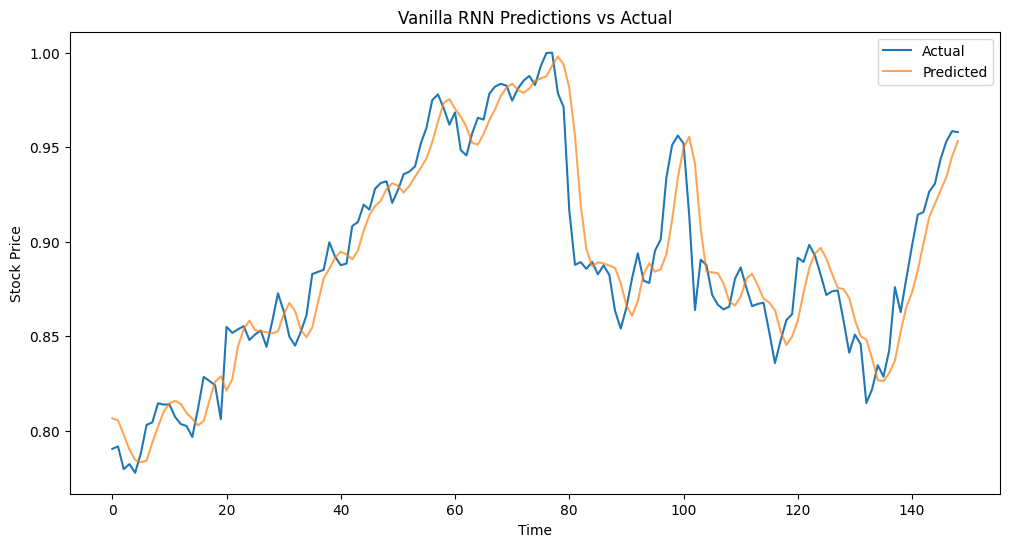

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_apple_test, label='Actual')
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.title('Vanilla RNN Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

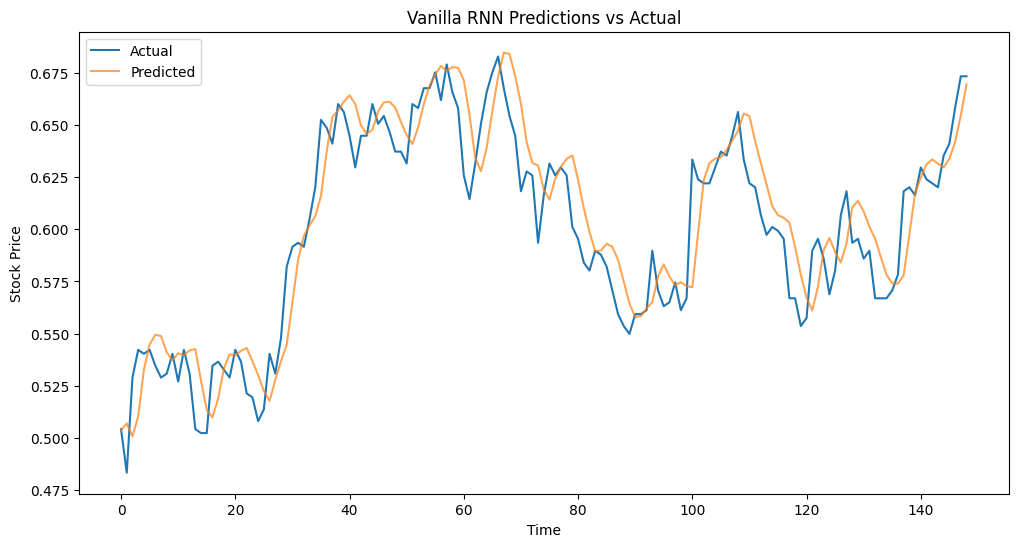

In [ ]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(y_samsung_test, label='Actual')
plt.plot(y_pred_samsung, label='Predicted', alpha=0.7)
plt.title('Vanilla RNN Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
